In [1]:
import pandas as pd
from learning.memory import run_memory

# load data
data = pd.read_csv('data/inputs/fredmd_transf.csv')

# fix dates
print(data.index)
data["date"] = pd.to_datetime(data["date"])
data = data.set_index("date")

# compute moving average
data = data.rolling(window=12).mean()

# drop missing values
data = data.dropna()

memory, all_centroids, all_probs = run_memory(
    data=data,
    fix_start=True,
    estimation_window=12 * 4,
    k_opt_method="elbow",
    clustering_method="kmeans"
)
memory

RangeIndex(start=0, stop=757, step=1)


Building memory using window: 296: : 297it [00:21, 13.78it/s]                       


,cluster_step0,cluster_step1,cluster_step2,cluster_step3,cluster_step4,cluster_step5,cluster_step6,cluster_step7,cluster_step8,cluster_step9,...,cluster_step287,cluster_step288,cluster_step289,cluster_step290,cluster_step291,cluster_step292,cluster_step293,cluster_step294,cluster_step295,cluster_step296
date,,,,,,,,,,,,,,,,,,,,,
1993-02-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3
1993-03-01,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5
1993-04-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5
1993-05-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5
1993-06-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4
2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,3.0,3
2022-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2


In [2]:
# here we get the final clusters, probabilities and centroids
final_clusters = memory[f"cluster_step{len(all_probs) - 1}"]
final_probs = all_probs[-1]
final_centroids = all_centroids[-1]

In [3]:
# a block to check if the probabilities are consistent
test_segment = 290
test_month = 300
print(all_probs[test_segment].shape)
print(all_probs[test_segment][test_month])
print(memory[f"cluster_step{test_segment}"][test_month])

(338, 6)
[0.15806459 0.1922798  0.12508826 0.17319253 0.19877759 0.15259724]
4.0


<Figure size 640x480 with 0 Axes>

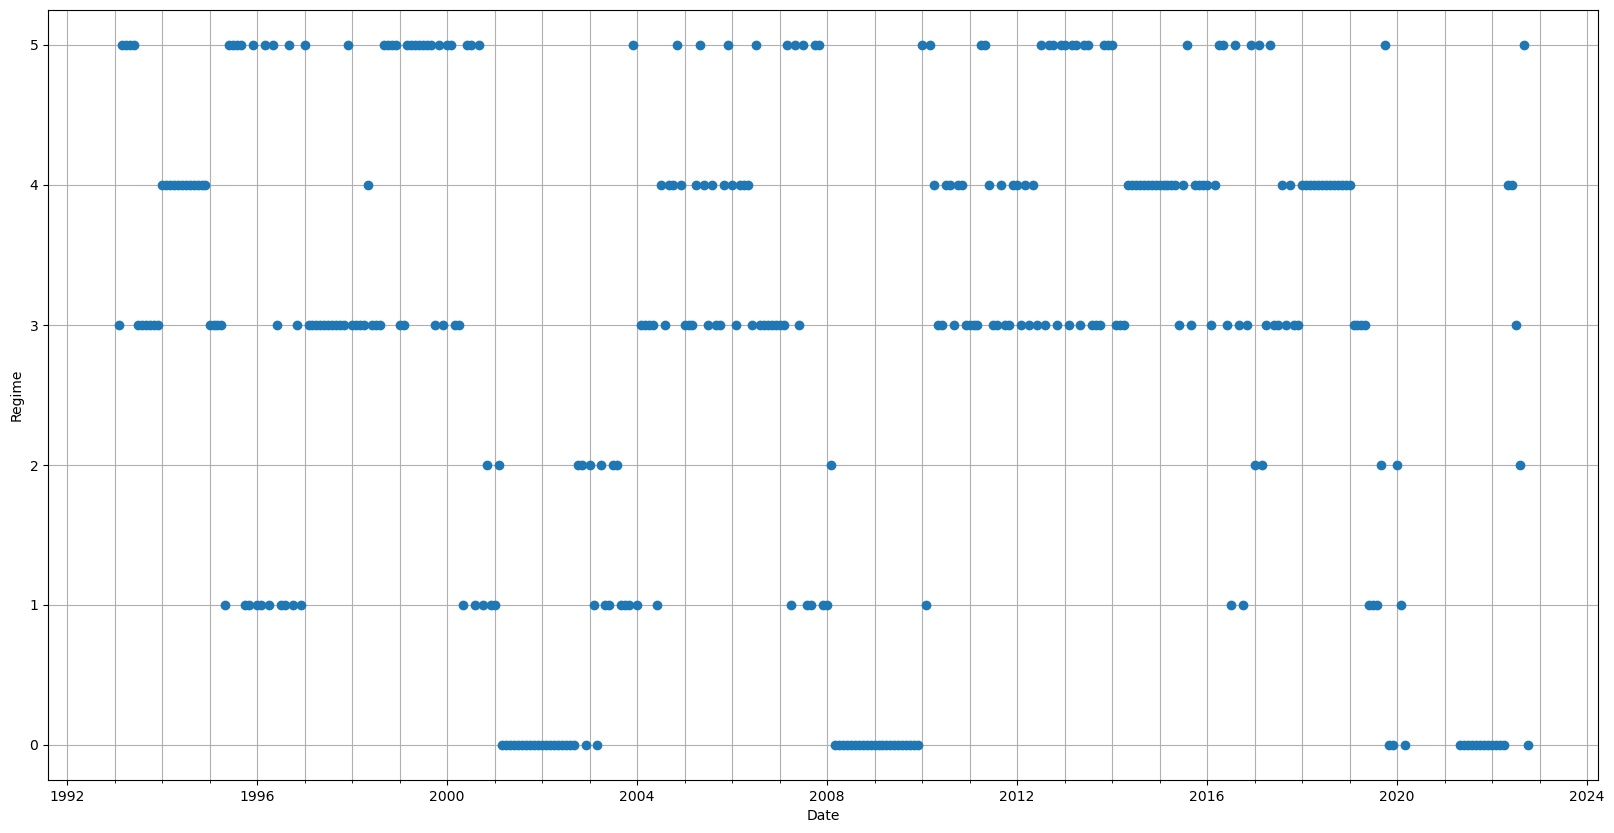

In [4]:
#shown_step = 100
#shown_clusters = memory[f"cluster_step{shown_step}"]
shown_clusters = final_clusters

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.clf()
plt.figure(figsize=(20, 10))
plt.plot(shown_clusters.index, shown_clusters.values, marker="o", linestyle="")
ax = plt.gca()
ax.xaxis.set_minor_locator(mdates.YearLocator())
plt.xlabel("Date")
plt.ylabel("Regime")
plt.grid(which="both")

<Figure size 640x480 with 0 Axes>

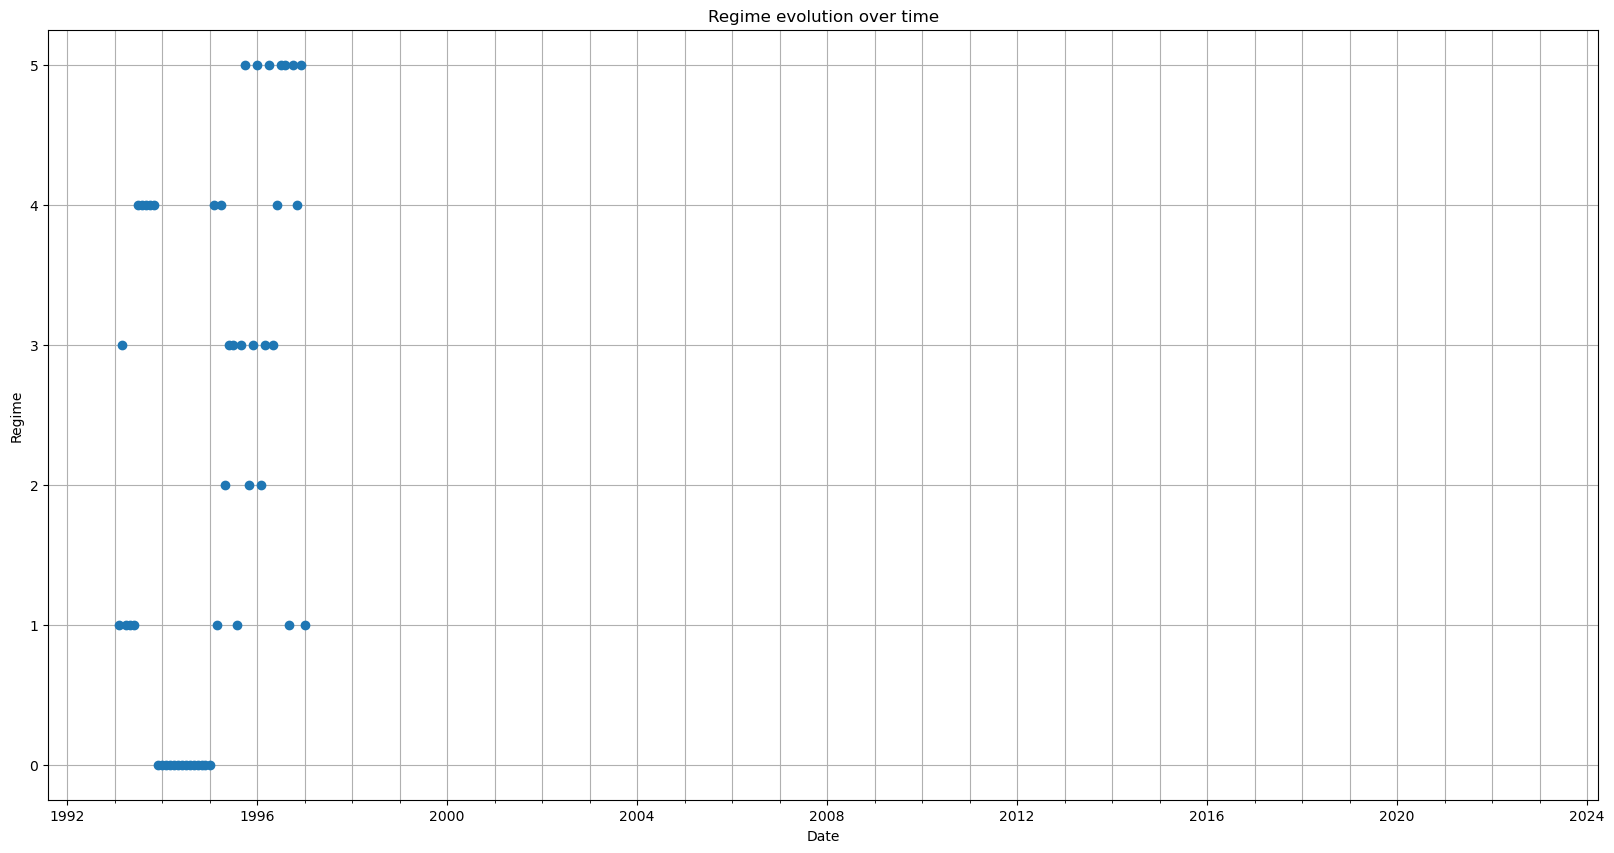

In [5]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

shown_clusters = memory[f"cluster_step{len(all_probs) - 1}"]
plt.clf()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plot = ax.plot(shown_clusters.index, shown_clusters.values, marker="o", linestyle="")[0]
ax.xaxis.set_minor_locator(mdates.YearLocator())
ax.set(xlabel="Date", ylabel="Regime", title="Regime evolution over time")
plt.grid(which="both")

def update(frame):
    shown_clusters = memory[f"cluster_step{frame}"]
    plot.set_xdata(shown_clusters.index)
    plot.set_ydata(shown_clusters.values)
    return plot
ani = animation.FuncAnimation(fig=fig, func=update, frames=len(all_probs) - 1, interval=1)
ani.save(filename="regime_evolution.gif", writer="pillow")

In [6]:
raw_data = pd.read_csv('data/inputs/fredmd_transf.csv')
raw_data["date"] = pd.to_datetime(raw_data["date"])
raw_data = raw_data.set_index("date")
raw_data = raw_data.dropna()

major_cols = ['RPI', 'UNRATE', 'UMCSENTx', 'FEDFUNDS', 'CPIAUCSL', 'S&P 500']

for i in range(final_probs.shape[1]):
    cur_cluster = final_clusters[final_clusters == i]
    fred_data = raw_data.loc[cur_cluster.index]
    print(f"Cluster {i} Statistics:")
    # get average of each column
    cur_list = []
    for col in major_cols:
        print(f"    {col}: {fred_data[col].mean()}")
        cur_list.append(fred_data[col].mean())
    print(cur_list)

Cluster 0 Statistics:
    RPI: -0.0014063360685527084
    UNRATE: 0.088135593220339
    UMCSENTx: -0.5508474576271188
    FEDFUNDS: -0.12101694915254238
    CPIAUCSL: 0.00231827743699869
    S&P 500: -0.012357737202236391
[-0.0014063360685527084, 0.088135593220339, -0.5508474576271188, -0.12101694915254238, 0.00231827743699869, -0.012357737202236391]
Cluster 1 Statistics:
    RPI: 0.0025134807406417387
    UNRATE: 0.01428571428571427
    UMCSENTx: -0.5428571428571431
    FEDFUNDS: -0.05857142857142849
    CPIAUCSL: 0.002040709314097043
    S&P 500: 0.0054000983983633725
[0.0025134807406417387, 0.01428571428571427, -0.5428571428571431, -0.05857142857142849, 0.002040709314097043, 0.0054000983983633725]
Cluster 2 Statistics:
    RPI: 0.002314493143471679
    UNRATE: -0.03571428571428568
    UMCSENTx: 0.24285714285714327
    FEDFUNDS: -0.08857142857142856
    CPIAUCSL: 0.001984000707704471
    S&P 500: 0.013375466605101385
[0.002314493143471679, -0.03571428571428568, 0.24285714285714327, -

In [9]:
from learning.memory import compute_transition_matrix
transition_test = compute_transition_matrix(memory)
print(transition_test[-1])

[[0.89655172 0.         0.06896552 0.         0.01724138 0.01724138]
 [0.05714286 0.31428571 0.14285714 0.08571429 0.02857143 0.37142857]
 [0.21428571 0.35714286 0.14285714 0.07142857 0.         0.21428571]
 [0.         0.08163265 0.01020408 0.52040816 0.20408163 0.18367347]
 [0.         0.         0.         0.30555556 0.625      0.06944444]
 [0.03030303 0.16666667 0.03030303 0.3030303  0.07575758 0.39393939]]


<Figure size 640x480 with 0 Axes>

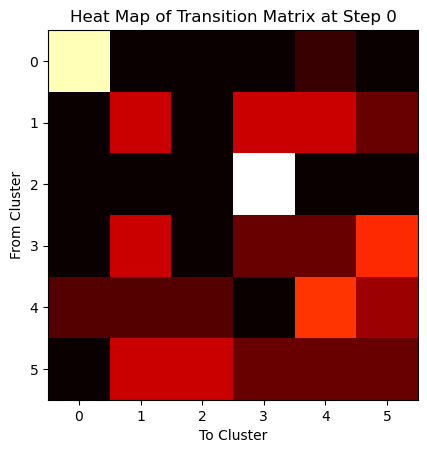

In [10]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.clf()
fig, ax = plt.subplots()
im = ax.imshow(transition_test[0], cmap='hot', interpolation='nearest')
def update(frame):
    im.set_data(transition_test[frame])
    ax.set_title(f'Heat Map of Transition Matrix at Step {frame}')
    ax.set_xlabel('To Cluster')
    ax.set_ylabel('From Cluster')
    return im
ani = animation.FuncAnimation(fig=fig, func=update, frames=len(transition_test), interval=1)
ani.save(filename="cluster_transition_evolution.gif", writer="pillow")

[[16.05108928 15.05504777 17.22798824 19.09745481 12.61121468 19.95720522]]

[[16.14029337 17.51985406 16.91811097 17.58257707 15.10325962 18.12206342]]

[[16.21022452 17.51506719 17.27179569 17.16378274 16.07046799 17.53298018]]

[[16.30383286 17.34102072 17.17945173 17.03824751 16.50609973 17.25932211]]

[[16.38418168 17.17851948 17.05655139 16.9964085  16.72100755 17.1175094 ]]

[[16.44900293 17.06436257 16.96479871 16.97792715 16.83269269 17.03687322]]

[[16.50132609 16.99073754 16.90621185 16.96603629 16.89124909 16.98812579]]

[[16.54436516 16.94476621 16.87146452 16.95623682 16.92082828 16.9572944 ]]

[[16.58053395 16.91636706 16.85199826 16.94740344 16.93417993 16.93700939]]

[[16.6114991  16.89881741 16.84184752 16.93928855 16.93841694 16.92312598]]

[[16.63839459 16.88788993 16.83721042 16.93184397 16.93762139 16.91322448]]

[[16.66200355 16.88099149 16.83575512 16.9250494  16.93416184 16.90586094]]

[[16.68288324 16.87654833 16.83607933 16.91887694 16.92941214 16.90016069]]


<Figure size 640x480 with 0 Axes>

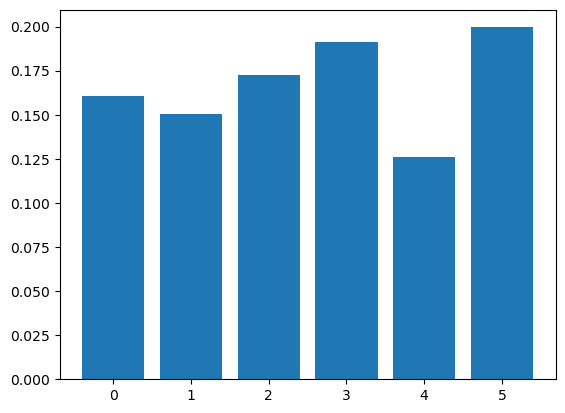

In [11]:
import numpy as np

# probability distribution prediction over time
horizon = 36
starting_month = 300

starting_dist = final_probs[starting_month]
transition_mat = transition_test[-1]
dists = []
cur_dist = np.array(starting_dist).reshape(-1, 1)
dists.append(cur_dist.copy())
print(cur_dist.T * 100)
print('')
for i in range(horizon):
    cur_dist = np.matmul(transition_mat, cur_dist)
    dists.append(cur_dist.copy())
    print(cur_dist.T * 100)
    print('')

import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.clf()
fig, ax = plt.subplots()
x = list(range(6))
im = ax.bar(x, dists[0].reshape(-1))
def update(frame):
    for i, b in enumerate(im):
        b.set_height(dists[frame].reshape(-1)[i])
    return im
ani = animation.FuncAnimation(fig=fig, func=update, frames=len(dists), interval=1)
ani.save(filename="prob_dist_evolution.gif", writer="pillow")